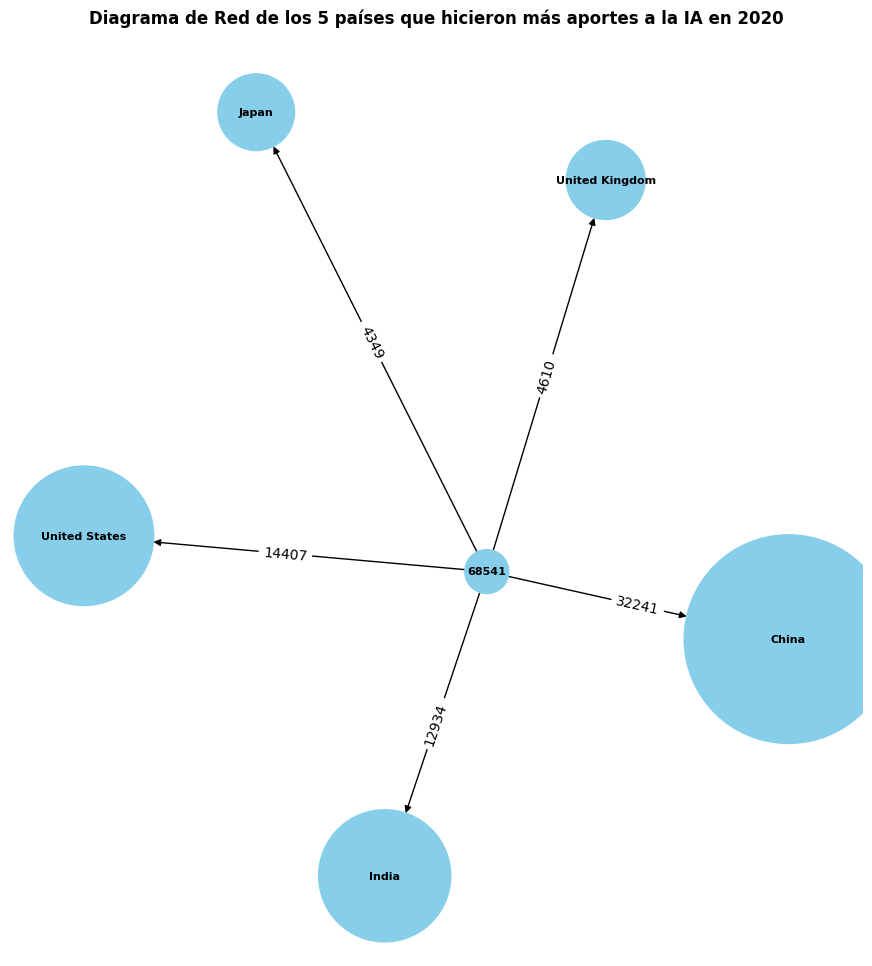

In [28]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Leer los datos desde la URL
data = pd.read_csv("https://raw.githubusercontent.com/Gianmarcos97/30daychartchallenge/main/Day08-circular/paises-con-mas-aportes.csv")

# Filtrar el DataFrame original para quedarse solo con las primeras 6 filas
data = data.head(5)

total_documents = data['Documents'].sum()

# Crear un grafo dirigido
G = nx.DiGraph()

# Agregar el nodo central con el total de "Documents"
G.add_node(total_documents)

# Agregar nodos para cada país y conectarlos al nodo central
for _, row in data.iterrows():
    G.add_node(row['Country'], documents=row['Documents'])
    G.add_edge(total_documents, row['Country'], weight=row['Documents'])

# Ajustar el tamaño de todos los nodos
node_scale_factor = 0.7  # Factor de escala para reducir el tamaño de los nodos
node_sizes = [G.nodes[n]['documents'] * node_scale_factor if n != total_documents else 1000 for n in G.nodes()]

# Dibujar el grafo
pos = nx.spring_layout(G, k=0.3)  # Ajustar k para aumentar el espacio entre los nodos
fig, ax = plt.subplots(figsize=(11, 12))  # Ajustar el tamaño de la imagen
nx.draw(G, pos, ax=ax, node_size=node_sizes, with_labels=True, font_size=8, node_color='skyblue', font_weight='bold')
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title("Diagrama de Red de los 5 países que hicieron más aportes a la IA en 2020", fontweight="bold")
plt.show()